# example nn
## imports

In [16]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
random_seed = 101
np.random.seed(random_seed)
tf.set_random_seed(random_seed)

## declaring structure

In [3]:
n_features = 10
n_dense_neurons = 3

## placeholders and vars

In [5]:
#none is specified because we're not sure of batch size yet (batch size is # of data points)
#shape is rows by columns, rows being data points, columns being features
x = tf.placeholder(tf.float32, (None, n_features))
w = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))
b = tf.Variable(tf.ones([n_dense_neurons]))

## operations

In [7]:
xw = tf.matmul(x, w)
z = tf.add(xw, b)
o = tf.sigmoid(z)

## initialize global variables

In [8]:
init = tf.global_variables_initializer()

## session

In [11]:
with tf.Session() as sess:
    #run initializer
    sess.run(init)
    #get output
    layer_out = sess.run(o, feed_dict={
        x: np.random.random([1, n_features])
    })
layer_out

array([[ 0.1516224 ,  0.3838374 ,  0.90244687]], dtype=float32)

# simple regression (new network)
## getting data
Below we'll create some data. Using NumPy's linear spacing function, we'll grab 10 data points equally spaced between 0 and 10, and we'll use a random uniform distribution to add a small amount of noise to each point, where the noise per-point is bounded between -1.5 and 1.5.

In [12]:
x_data = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)
x_data

array([  1.23946067,   2.03487156,   1.93121571,   2.90500636,
         5.80307459,   5.08645029,   7.76196612,   8.76861091,
         9.00337324,  11.26740812])

In [14]:
y_label = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)
y_label

array([ 0.5420333 ,  1.17575569,  0.85241231,  2.50514314,  4.67005971,
        4.41685654,  6.66701681,  6.69180648,  7.54731409,  9.03483077])

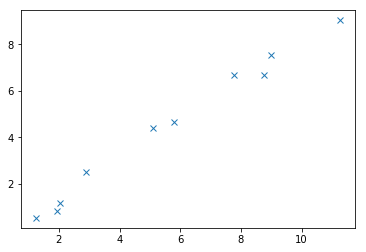

In [20]:
# plt.plot(x_data, y_label)
plt.plot(x_data, y_label, "x")

## goal
Attempting to fit data to some regressor `y=mx+b`. We'll randomly initialize the slope and the bias.

In [21]:
slope_and_bias = np.random.rand(2)
slope_and_bias

array([ 0.44236813,  0.87758732])

In [23]:
m = tf.Variable(slope_and_bias[0])
b = tf.Variable(slope_and_bias[1])

## cost function

In [24]:
error = 0

for x,y in zip(x_data, y_label):
    #predicted value
    y_hat = m * x + b
    #actual value is y_label
    error += (y - y_hat)**2
error

<tf.Tensor 'add_19:0' shape=() dtype=float64>

## optimizer (gradient descent)
The optimizer should be trying to minimize the error after each epoch (pass through the network).

In [25]:
learning_rate = 0.001

In [26]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(error)

## initialize global variables

In [27]:
init = tf.global_variables_initializer()

## session

In [29]:
with tf.Session() as sess:
    sess.run(init)
    training_steps = 100
    for i in range(training_steps):
        sess.run(train)
        #store slope/intercept from first iteration (inefficient but it's fine rn)
        if i == 0:
            slope_0, intercept_0 = sess.run([m, b])
    final_slope, final_intercept = sess.run([m, b])
print("First slope: {}, First intercept: {}".format(slope_0, intercept_0))
print("Final slope: {}, Final intercept: {}".format(final_slope, final_intercept))

Final slope: 0.6540503276312843, Final intercept: 0.8988724814609277


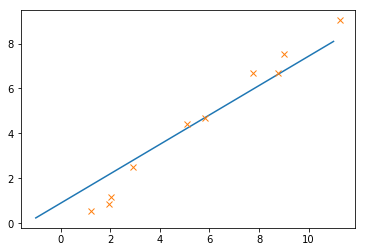

In [31]:
x_test = np.linspace(-1, 11, 10)
y_pred_plot_0 = slope_0 * x_test + intercept_0
y_pred_plot_final = final_slope * x_test + final_intercept
plt.plot(x_test, y_pred_plot)

plt.plot(x_data, y_label, "x")